## transform函数
understanding the transform function im pandas
transform()在汇总数据时提示效率的


"sales_transactions.xlsx"表中有三个订单(10001,10005,1006)
 计算每个产品占订单的百分比
## 第一种方法-合并


In [3]:
import pandas as pd
df = pd.read_excel("sales_transactions.xlsx")
df.groupby("order")["ext price"].sum()

order
10001     576.12
10005    8185.49
10006    3724.49
Name: ext price, dtype: float64

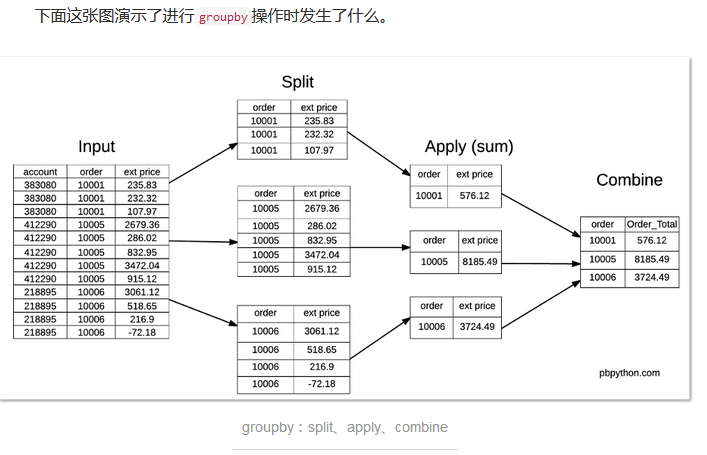

In [11]:
# 将产生的结果连接到原数据
order_total = df.groupby("order")["ext price"].sum().rename("order_total").reset_index()
print(order_total)
df_1 = df.merge(order_total)
#merge的时候省略了一些细节，因为有共同字段Order，所以自动对齐，实际上相当于df.merge(order_total,on ='order',how = left)
df_1["Percent_of_Order"] = df_1["ext price"] / df_1["order_total"]
#print(df_1)

   order  order_total
0  10001       576.12
1  10005      8185.49
2  10006      3724.49


## transform函数
单纯的groupby进行sum聚合得到的数据尺寸和transform不同。普通聚合函数返回聚合以后的结果。
transform返回的计算结果保留的是原始数据的索引，即为transform的独特性

In [13]:
df.groupby("order")["ext price"].transform("sum")

0      576.12
1      576.12
2      576.12
3     8185.49
4     8185.49
5     8185.49
6     8185.49
7     8185.49
8     3724.49
9     3724.49
10    3724.49
11    3724.49
Name: ext price, dtype: float64

In [15]:
df["Order_Total"] = df.groupby('order')["ext price"].transform('sum')
df["Percent_of_Order"] = df["ext price"] / df["Order_Total"]
print(df)

    account           name  order       sku  quantity  unit price  ext price  \
0    383080       Will LLC  10001  B1-20000         7       33.69     235.83   
1    383080       Will LLC  10001  S1-27722        11       21.12     232.32   
2    383080       Will LLC  10001  B1-86481         3       35.99     107.97   
3    412290  Jerde-Hilpert  10005  S1-06532        48       55.82    2679.36   
4    412290  Jerde-Hilpert  10005  S1-82801        21       13.62     286.02   
5    412290  Jerde-Hilpert  10005  S1-06532         9       92.55     832.95   
6    412290  Jerde-Hilpert  10005  S1-47412        44       78.91    3472.04   
7    412290  Jerde-Hilpert  10005  S1-27722        36       25.42     915.12   
8    218895      Kulas Inc  10006  S1-27722        32       95.66    3061.12   
9    218895      Kulas Inc  10006  B1-33087        23       22.55     518.65   
10   218895      Kulas Inc  10006  B1-33364         3       72.30     216.90   
11   218895      Kulas Inc  10006  B1-20


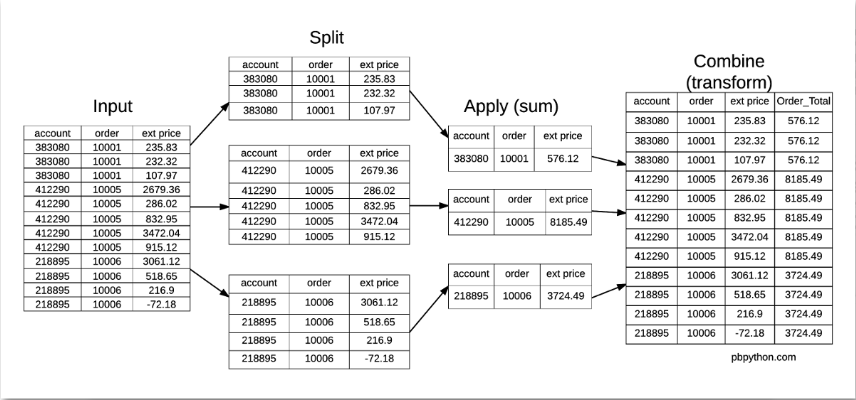

## groupby函数
Groupby 可以简单总结为 split, apply, combine, 也就是说:


split  : 先将数据按一个属性分组 (得到 DataFrameGroupby / SeriesGroupby )

apply  : 对每一组数据进行操作 (取平均 取中值 取方差 或 自定义函数)

combine: 将操作后的结果结合起来 (得到一个DataFrame 或 Series 或可视化图像)

- groupby常用方法  
df.groupby(['','']).size() #内置函数 统计分组大小  
df.groupby(['','']).agg(['max','自定义函数']) # agg聚合运算 使用的函数返回标量  
df.groupby(['','']).apply(['自定义函数']) #apply聚合运算 使用的函数返回 和调用者一个数据结构  



## 数据的分组和聚合
pandas中的groupby提供了一个高效的数据的分组运算。
我们通过一个或多个分类变量将数据拆分，然后分别在拆分以后的数据上进行需要的计算。

执行单个操作可以直接使用内置函数 如max求每组最大值 size查看每组大小
执行多个操作聚合运算 可以使用agg方法，返回的标量结果
更广泛的分组运算 使用apply更一般化

我们可以把上述过程理解为三个步骤:

拆分数据 split
应用某个函数 apply
汇总结算结果 appregate


主要思想是分拆-应用-汇总。
对于一些简单的计算，比如最大值最小值的计算，我们可以直接使用groupby之后采用相应的内置方法。
对于一些更为复杂的计算，我们需要自己定义函数然后应用到拆分后的子数据上。根据具体要求来决定使用agg方法还是apply方法
